In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# 1. Carregar o dataset e manter apenas a primeira coluna
# Substitua 'seu_arquivo.csv' pelo nome do seu arquivo CSV
dataset = pd.read_csv('heart_rate.csv')
heartbeats = dataset.iloc[:, 0].values  # Mantendo apenas a primeira coluna

# 2. Função para criar sequências de dados para o treinamento do modelo
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# 3. Definindo o tamanho das sequências
seq_length = 10

# 4. Criando sequências de dados
X, y = create_sequences(heartbeats, seq_length)

# 5. Dividindo os dados em treinamento (70%) e teste (30%)
split_index = int(0.7 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# 6. Remodelando os dados para o formato esperado pelo RNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# 7. Criando o modelo RNN
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))

# 8. Compilando o modelo
model.compile(optimizer='adam', loss='mse')

# 9. Treinando o modelo
model.fit(X_train, y_train, epochs=200, validation_split=0.2, verbose=1)

# 10. Fazendo previsões com o modelo treinado
predictions = model.predict(X_test)

# 11. Arredondando as previsões para o inteiro mais próximo
predictions = np.round(predictions).astype(int)

# Exibindo algumas previsões
print("Previsões dos próximos batimentos cardíacos (inteiros):", predictions.flatten())

# 12. Utilizando 10 novos batimentos para prever o próximo batimento
new_heartbeats = np.array([89, 90, 91, 91, 92, 91, 91, 90, 92, 93]).reshape((1, seq_length, 1))
next_heartbeat = model.predict(new_heartbeats)

# Arredondando a previsão para o inteiro mais próximo
next_heartbeat = np.round(next_heartbeat).astype(int)

# Exibindo o próximo batimento previsto
print("Próximo batimento cardíaco previsto (inteiro):", next_heartbeat[0][0])


Epoch 1/200
32/32 [==============================] - 2s 12ms/step - loss: 2212.5547 - val_loss: 108.5042
Epoch 2/200
32/32 [==============================] - 0s 4ms/step - loss: 24.4715 - val_loss: 8.9173
Epoch 3/200
32/32 [==============================] - 0s 5ms/step - loss: 5.3000 - val_loss: 7.6255
Epoch 4/200
32/32 [==============================] - 0s 5ms/step - loss: 3.9844 - val_loss: 7.5883
Epoch 5/200
32/32 [==============================] - 0s 4ms/step - loss: 3.9351 - val_loss: 7.5604
Epoch 6/200
32/32 [==============================] - 0s 4ms/step - loss: 3.9539 - val_loss: 7.5386
Epoch 7/200
32/32 [==============================] - 0s 5ms/step - loss: 3.9512 - val_loss: 7.5564
Epoch 8/200
32/32 [==============================] - 0s 5ms/step - loss: 3.9869 - val_loss: 7.6503
Epoch 9/200
32/32 [==============================] - 0s 5ms/step - loss: 3.9150 - val_loss: 7.7020
Epoch 10/200
32/32 [==============================] - 0s 5ms/step - loss: 4.1056 - val_loss: 7.4529
Ep

Epoch 1/200
32/32 [==============================] - 2s 12ms/step - loss: 0.0928 - val_loss: 0.0105
Epoch 2/200
32/32 [==============================] - 0s 5ms/step - loss: 0.0053 - val_loss: 0.0079
Epoch 3/200
32/32 [==============================] - 0s 5ms/step - loss: 0.0041 - val_loss: 0.0066
Epoch 4/200
32/32 [==============================] - 0s 5ms/step - loss: 0.0035 - val_loss: 0.0061
Epoch 5/200
32/32 [==============================] - 0s 6ms/step - loss: 0.0032 - val_loss: 0.0055
Epoch 6/200
32/32 [==============================] - 0s 6ms/step - loss: 0.0030 - val_loss: 0.0057
Epoch 7/200
32/32 [==============================] - 0s 7ms/step - loss: 0.0029 - val_loss: 0.0047
Epoch 8/200
32/32 [==============================] - 0s 9ms/step - loss: 0.0026 - val_loss: 0.0046
Epoch 9/200
32/32 [==============================] - 0s 9ms/step - loss: 0.0028 - val_loss: 0.0046
Epoch 10/200
32/32 [==============================] - 0s 8ms/step - loss: 0.0026 - val_loss: 0.0043
Epoch 11

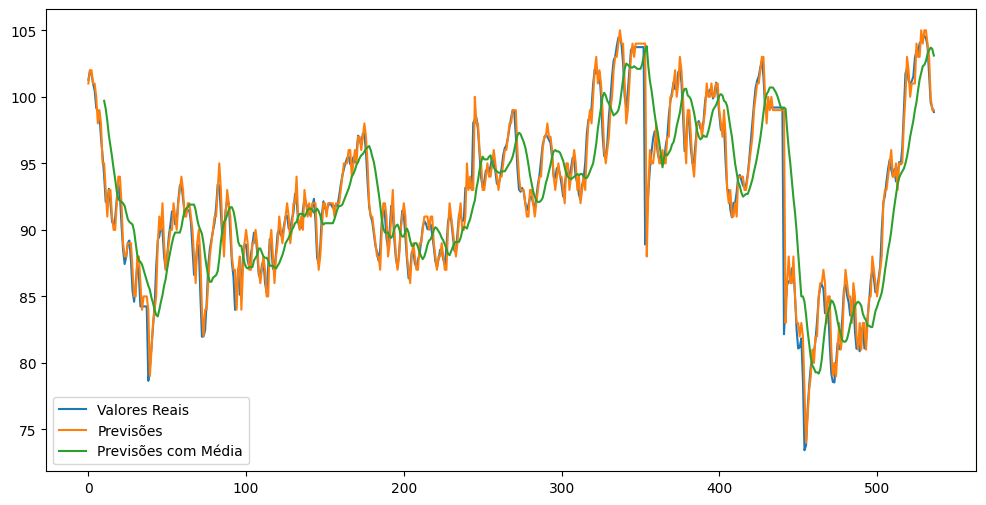

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# 1. Carregar o dataset e manter apenas a primeira coluna
dataset = pd.read_csv('heart_rate.csv')
heartbeats = dataset.iloc[:, 0].values  # Mantendo apenas a primeira coluna

# Verificar se há valores ausentes
if np.any(np.isnan(heartbeats)):
    print("O dataset contém valores ausentes. Por favor, limpe os dados e tente novamente.")
    exit()

# 2. Normalização dos dados
scaler = MinMaxScaler(feature_range=(0, 1))
heartbeats = scaler.fit_transform(heartbeats.reshape(-1, 1)).flatten()

# 3. Função para criar sequências de dados para o treinamento do modelo
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# 4. Definindo o tamanho das sequências
seq_length = 10

# 5. Criando sequências de dados
X, y = create_sequences(heartbeats, seq_length)

# 6. Dividindo os dados em treinamento (70%) e teste (30%)
split_index = int(0.7 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# 7. Remodelando os dados para o formato esperado pelo RNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# 8. Criando o modelo RNN
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))

# 9. Compilando o modelo
model.compile(optimizer='adam', loss='mse')

# 10. Treinando o modelo
model.fit(X_train, y_train, epochs=200, validation_split=0.2, verbose=1)

# 11. Fazendo previsões com o modelo treinado
predictions = model.predict(X_test)

# Desnormalizando as previsões
predictions = scaler.inverse_transform(predictions).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Arredondando as previsões para o inteiro mais próximo
predictions = np.round(predictions).astype(int)

# Exibindo algumas previsões
print("Previsões dos próximos batimentos cardíacos (inteiros):", predictions[:10])

# 12. Utilizando 10 novos batimentos para prever o próximo batimento
new_heartbeats = np.array([89, 90, 91, 91, 92, 91, 91, 90, 92, 93])
new_heartbeats_normalized = scaler.transform(new_heartbeats.reshape(-1, 1)).flatten()
new_heartbeats_normalized = new_heartbeats_normalized.reshape((1, seq_length, 1))
next_heartbeat = model.predict(new_heartbeats_normalized)

# Desnormalizando a previsão
next_heartbeat = scaler.inverse_transform(next_heartbeat).flatten()

# Arredondando a previsão para o inteiro mais próximo
next_heartbeat = np.round(next_heartbeat).astype(int)

# Exibindo o próximo batimento previsto
print("Próximo batimento cardíaco previsto (inteiro):", next_heartbeat[0])

# 13. Calculando a média dos últimos 10 batimentos previstos
def predict_with_average(predictions, seq_length):
    avg_predictions = []
    for i in range(seq_length, len(predictions)):
        avg_predictions.append(np.mean(predictions[i-seq_length:i]))
    return avg_predictions

# Aplicando a nova feature
average_predictions = predict_with_average(predictions, seq_length)

# Exibindo algumas previsões baseadas na média
print("Previsões dos próximos batimentos cardíacos usando a média (inteiros):", np.round(average_predictions).astype(int)[:10])

# 14. Plotando os resultados
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Valores Reais')
plt.plot(predictions, label='Previsões')
plt.plot(range(seq_length, len(y_test)), average_predictions, label='Previsões com Média')
plt.legend()
plt.show()


APRESENTAÇÃO TCC


MAE: Média de quanto você errou em cada previsão.

RMSE: Média dos erros, mas dá mais peso aos erros grandes.

R²: Mostra quão bem o modelo está fazendo as previsões (1 é perfeito, 0 significa que não está prevendo bem).

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculando as métricas de avaliação
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


MAE: 0.7847540037243951
RMSE: 1.3810689747364235
R²: 0.9476310059272333


Resumo

MAE: 0.78 - Em média, as previsões estão errando por cerca de 0.78 batimentos cardíacos, o que é um erro relativamente pequeno.

RMSE: 1.38 - Este valor também é baixo, indicando que os erros maiores estão sendo penalizados, mas não são muito comuns.

R²: 0.95 - O modelo está explicando 95% da variação nos batimentos cardíacos reais, o que é excelente.

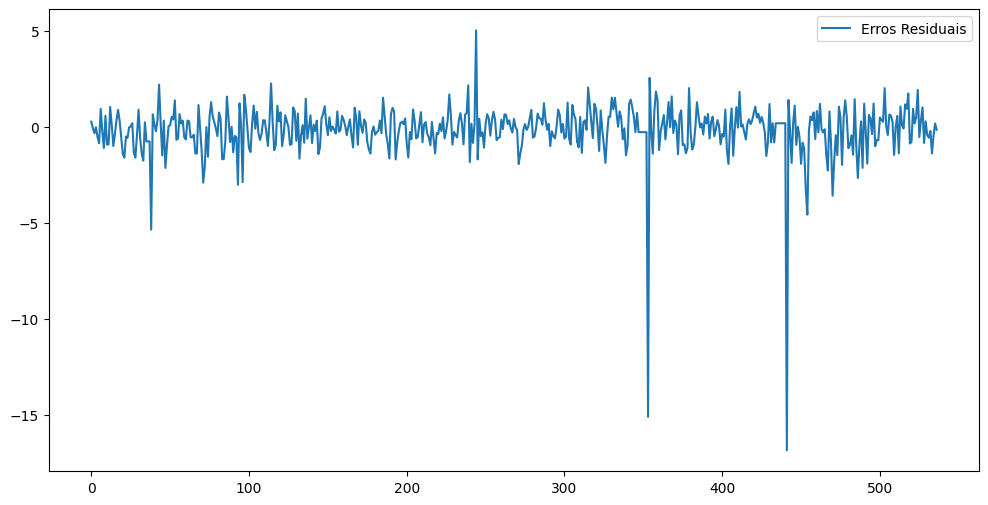

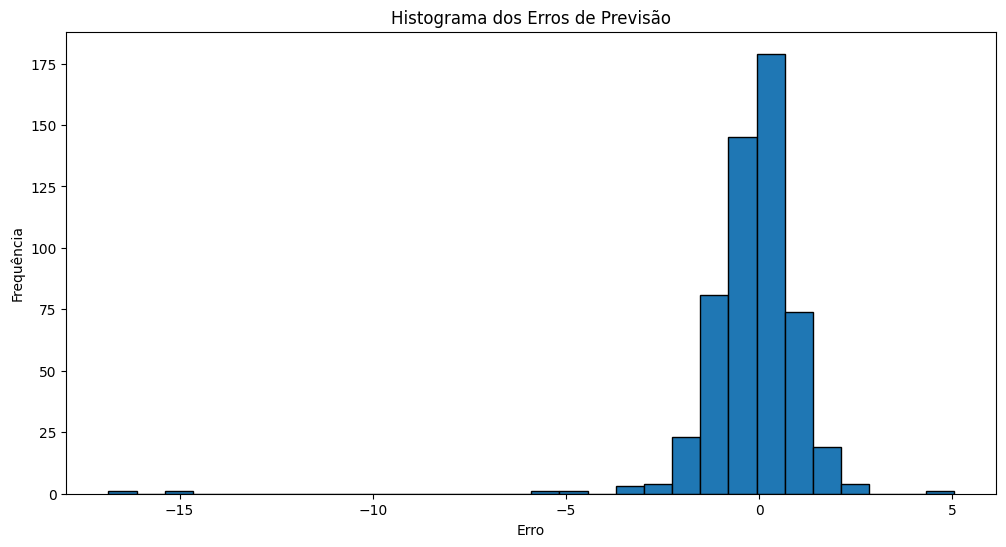

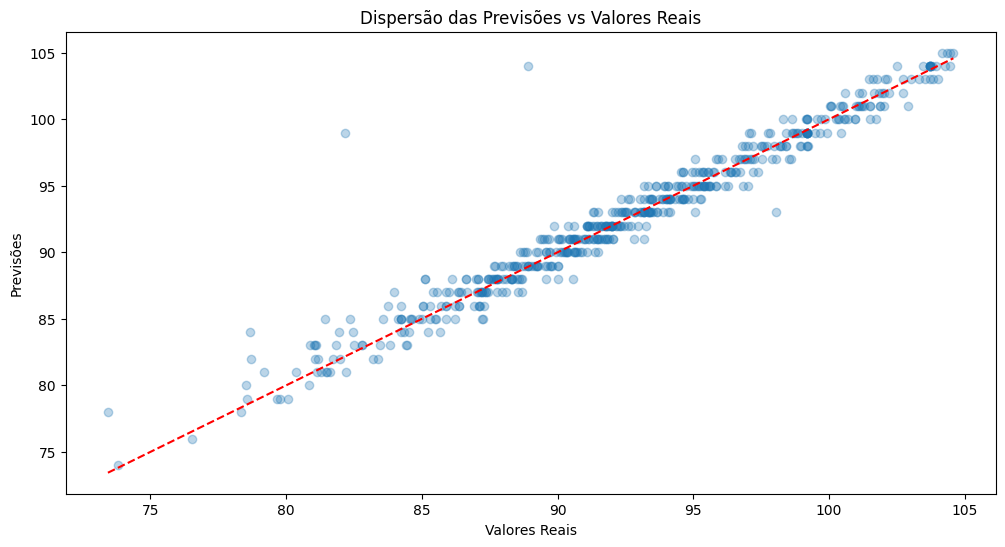

In [ ]:
# Erros residuais
residuals = y_test - predictions

plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Erros Residuais')
plt.legend()
plt.show()

# Histograma dos erros de previsão
plt.figure(figsize=(12, 6))
plt.hist(residuals, bins=30, edgecolor='k')
plt.title('Histograma dos Erros de Previsão')
plt.xlabel('Erro')
plt.ylabel('Frequência')
plt.show()

# Gráfico de dispersão das previsões vs valores reais
plt.figure(figsize=(12, 6))
plt.scatter(y_test, predictions, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Dispersão das Previsões vs Valores Reais')
plt.show()


3. Validação Cruzada

Implemente a validação cruzada para garantir que o modelo seja robusto e generalize bem para novos dados. Isso pode ser feito dividindo o dataset em diferentes folds e treinando o modelo em cada um deles.

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
mae_scores = []

for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    # Remodelando os dados para o formato esperado pelo RNN
    X_train_fold = X_train_fold.reshape((X_train_fold.shape[0], X_train_fold.shape[1], 1))
    X_test_fold = X_test_fold.reshape((X_test_fold.shape[0], X_test_fold.shape[1], 1))

    # Treinando o modelo
    model.fit(X_train_fold, y_train_fold, epochs=50, verbose=0)

    # Fazendo previsões
    predictions_fold = model.predict(X_test_fold)
    predictions_fold = scaler.inverse_transform(predictions_fold).flatten()
    y_test_fold = scaler.inverse_transform(y_test_fold.reshape(-1, 1)).flatten()

    # Calculando o MAE para cada fold
    mae_fold = mean_absolute_error(y_test_fold, predictions_fold)
    mae_scores.append(mae_fold)

print(f"MAE médio: {np.mean(mae_scores)}")
print(f"Desvio padrão do MAE: {np.std(mae_scores)}")


12/12 [==============================] - 0s 2ms/step
MAE médio: 0.6927683482863782
Desvio padrão do MAE: 0.06330644871719272


4. Análise de Sensibilidade

Realize uma análise de sensibilidade para avaliar como as previsões do modelo mudam em resposta a variações nos dados de entrada.


In [ ]:
# Função para adicionar ruído aos dados
def add_noise(data, noise_level=0.1):
    noise = np.random.normal(0, noise_level, data.shape)
    return data + noise

# Testando diferentes níveis de ruído
noise_levels = [0.01, 0.05, 0.1, 0.2]
for noise_level in noise_levels:
    noisy_heartbeats = add_noise(new_heartbeats_normalized, noise_level)
    next_heartbeat_noisy = model.predict(noisy_heartbeats.reshape((1, seq_length, 1)))
    next_heartbeat_noisy = scaler.inverse_transform(next_heartbeat_noisy).flatten()
    next_heartbeat_noisy = np.round(next_heartbeat_noisy).astype(int)
    print(f"Próximo batimento com nível de ruído {noise_level}: {next_heartbeat_noisy[0]}")


1/1 [==============================] - 0s 21ms/step
Próximo batimento com nível de ruído 0.01: 93
1/1 [==============================] - 0s 22ms/step
Próximo batimento com nível de ruído 0.05: 95
1/1 [==============================] - 0s 22ms/step
Próximo batimento com nível de ruído 0.1: 99
1/1 [==============================] - 0s 21ms/step
Próximo batimento com nível de ruído 0.2: 106


6. Demonstração ao Vivo

Prepare um pequeno script ou uma interface que permita fazer previsões ao vivo com o modelo, utilizando novos dados de batimentos cardíacos inseridos manualmente ou via sensores.

In [ ]:
# Interface simples para previsão ao vivo
def live_prediction(model, scaler, input_data):
    input_data_normalized = scaler.transform(input_data.reshape(-1, 1)).flatten()
    input_data_normalized = input_data_normalized.reshape((1, len(input_data), 1))
    prediction = model.predict(input_data_normalized)
    prediction = scaler.inverse_transform(prediction).flatten()
    prediction = np.round(prediction).astype(int)
    return prediction[0]

# Exemplo de uso
#live_data = np.array([89, 90, 91, 91, 92, 91, 91, 90, 92, 93])
live_data = np.array([100, 101, 100, 102, 101, 100, 99, 100, 102, 103])
next_heartbeat_live = live_prediction(model, scaler, live_data)
print(f"Próximo batimento cardíaco previsto ao vivo: {next_heartbeat_live}")


1/1 [==============================] - 0s 20ms/step
Próximo batimento cardíaco previsto ao vivo: 103
